# Linear & Logistic Regression Homework

In [1]:
## importing libraries used in notebook 
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr

## Pearson Correlation Coefficient

<font size=5>$${r} = \frac{\sum_{}^{} ({x}-{\overline{x}})({y} - {\overline{y}})} {\sqrt{\sum({x}-{\overline{y}})^ 2} \sqrt{\sum({y}-{\overline{y}})^ 2 }} $$</font>

<br>
<font size=3>$${x} = Independent \ Variables $$
$$\overline{x} = \ Mean \ of \ Independent \ Variables $$
$${x} = Dependent \ Variables $$
$$\overline{y} = \ Mean \ of \ Dependent \ Variables $$
</font>

In [2]:
## function that calc mean 
def mean(array):
    return sum(array)/len(array)

## function that calc pearson correlation coefficient
## takes an array of tuples of size 2 (x,y)
## returns the r value 
def pearson_corr(array):
    ## unpacking  
    x = [num[0] for num in array]
    y = [num[1] for num in array]

    ## calc means 
    x_mean = mean(x)
    y_mean = mean(y)

    # calc r
    numerator = sum([(n[0] - x_mean) * (n[1] - y_mean) for n in array]) 
    denominator_x = (sum([(x - x_mean) ** 2 for x in x]) ** 0.5)
    denominator_y = (sum([(y - y_mean) ** 2 for y in y]) ** 0.5)
    return numerator / (denominator_x * denominator_y)

# dataset in the form of tuples (study hours, study-unit mark)
ds = [(84,70),(76,64),(90,83),(63,45), (55,40), (60,38), (34,20)]
r = pearson_corr(ds)
print("Pearson Correlation Coefficient (python):",r)

Pearson Correlation Coefficient (python): 0.9820405131850373


In [3]:
## pearsonr using scipy

x = [num[0] for num in ds]
y = [num[1] for num in ds]
r = pearsonr(x,y)[0]

print("Pearson Correlation Coefficient (scipy):",r)

Pearson Correlation Coefficient (scipy): 0.9820405131850373


In the dataset we used in the example we had the marks of a student and the hours spent studying.

<b>Which is the response variable and which is the explanatory variable ? </b> 

- Study Hours (explanatory variable) and it is plotted on the x-axis
- Study Unit Mark (response variable) and it is plotted on the y-axis


## Building a Simple Linear Regression Model using Ordinary Least Squares

## Ordinary Least Squares

<font size=5>$${m} = \dfrac{\sum\limits_{i=1}^{n} ({x_i - \overline{X}}) ({y_i} - \overline{Y})} {\sum\limits_{i=1}^{n} ({x_i - \overline{X}})^2} $$</font>
<br>

<font size=5>$${b} = \overline{Y} - {m}\overline{X}$$</font>
<br>

<font size=3>$${x} = Independent \ Variables $$
$$\overline{X} = \ Mean \ of \ Independent \ Variables $$
$${x} = Dependent \ Variables $$
$$\overline{Y} = \ Mean \ of \ Dependent \ Variables $$
</font>

OLS (pure python) m: 1.1182648401826485 b: -22.376908023483367
OLS (pure python) m: 1.1182648401826485 b: -22.376908023483367
OLS (statsmodels) m: 1.1182648401826485 b: -22.37690802348338


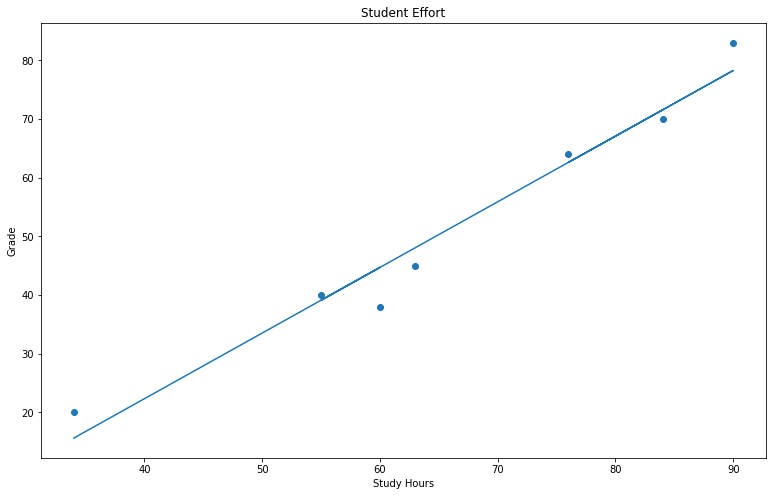

In [4]:
## building a simple linear regression model using OLS (studyhours/grades dataset)

## function that calc gradient and y-intercept using OLS 
## takes 2 arrays as arguments (must be of the same length)
## returns tuple (m,b)
def ols(x, y): ## OLS using just python
    
    ## calc means 
    x_m = mean(x)
    y_m = mean(y)
    
    ## make x and y arrays into a list of tuples
    xy = list(zip(x,y))
    
    ## calc m/gradient
    m_numerator = sum([(n[0] - x_m) * (n[1] - y_m) for n in xy])
    m_denominator = sum([(n[0]- x_m) ** 2 for n in xy])
    m = m_numerator / m_denominator
    
    ## calc b/y-intercept 
    b = y_m - m * x_m
    return (m,b) # returns tuple (gradient, y-intercept)


## function that calc gradient and y-intercept using OLS 
## takes 2 numpy arrays as arguments (must be of the same length)
## returns tuple (m,b)
def ols_numpy(x, y): ## OLS using numpy
    
    # calc means using numpy
    x_m = x.mean()
    y_m = y.mean()
    
    ## calc m/gradient
    m_numerator = np.sum((x - x_m) * (y - y_m)) ## using broadcasting 
    m_denominator = np.sum((x - x_m) ** 2)
    m = m_numerator / m_denominator
    
    ## calc b/y-intercept 
    b = y_m - m * x_m
    return(m,b) # returns tuple (gradient, y-intercept)

## calc m & y using OLS with pure python
olspy_params = ols(x, y)
print("OLS (pure python) m:",olspy_params[0],"b:",olspy_params[1])

## calc m & y using OLS with numpy 
x_np = np.array(x)
y_np = np.array(y)
olsnp_params = ols_numpy(x_np, y_np)
print("OLS (pure python) m:",olsnp_params[0],"b:",olsnp_params[1])

## calc m & y using OLS with statsmodels
X = sm.add_constant(x)
sm_model = sm.OLS(y, X).fit()
#print("\n" , sm_model.summary())
print("OLS (statsmodels) m:", sm_model.params[1],"b:",sm_model.params[0])

## plot simple linear regression model 
%matplotlib inline
plt.figure(figsize=(13,8))
plt.scatter(x, y) # plot the scatter plot
plt.title("Student Effort")
plt.xlabel("Study Hours")
plt.ylabel("Grade")
#model = x_np * olsnp_params[0] + olsnp_params[1] ## using numpy broadcasting
#plt.plot(x_np, model)
model = [num * olspy_params[0] + olspy_params[1] for num in x] ## using pure python
#print(model)
plt.plot(x, model) # plot the line
plt.show()

In [5]:
## using the model answer the following questions 
## - What mark will you get if you study for 80 hrs ?
## - How many hours of study do you need to get an A ?

## y = mx + b
q_1 = 80 * olspy_params[0] + olspy_params[1]
print("Q1: According to the model if you study for 80 hours you will score:", q_1)

## assuming you will need a grade of 90 to get an A 
## x = y - b / m !(m not equal to 0)!
q_2 = 90 - olspy_params[1] / olspy_params[0]
print("Q2: According to the model to get an A (90) you need to study for:", q_2 , "hours")

Q1: According to the model if you study for 80 hours you will score: 67.08427919112852
Q2: According to the model to get an A (90) you need to study for: 110.01038324680627 hours


Pearson Correlation Coefficient (scipy): -0.5625445471263226
OLS (pure python) m: -0.04997200374057575 b: 12862.955271681236


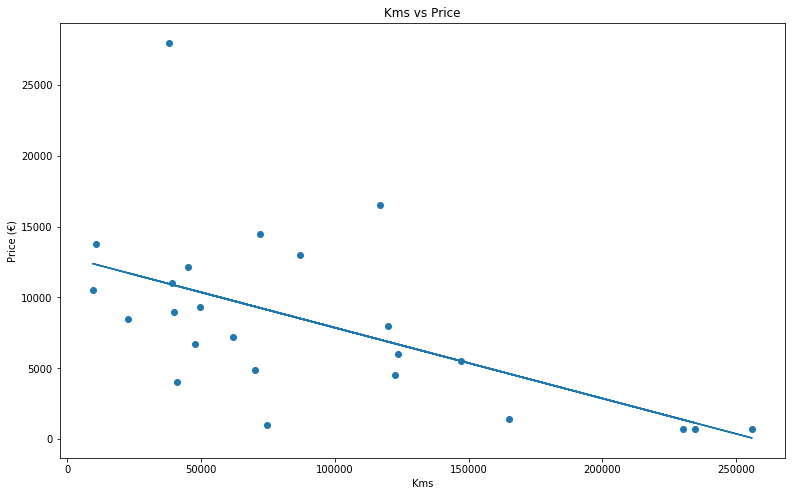

In [7]:
## building a simple linear regression model using OLS (car dataset - kms vs price)
car_ds = pd.read_csv("201819_car_insurance_data.csv")
x = [float(num[1].replace(",","")) for num in car_ds.values]
y = [float(num[2].replace(",","").replace("€", "")) for num in car_ds.values]

## calc pearson correlation coefficient
r = pearsonr(x,y)[0]
print("Pearson Correlation Coefficient (scipy):", r)

## calc m & y using OLS with pure python
olspy_params = ols(x, y)
print("OLS (pure python) m:",olspy_params[0],"b:",olspy_params[1])

## plot simple linear regression model 
plt.figure(figsize=(13,8))
plt.scatter(x, y) # plot the scatter plot
plt.title("Kms vs Price")
plt.xlabel("Kms")
plt.ylabel("Price (€)")
model = [num * olspy_params[0] + olspy_params[1] for num in x] ## using pure python
plt.plot(x, model) # plot the line
plt.show()

### Equations in Ordinary Least Squares (OLS)

A straight line is represented as follows:

<font size=4>$${y} = {mx} + {b}$$</font>

<font size=2>$${m} = slope/gradient$$
$${b} = y \ intercept$$</font>


In order to find a line of best fit we need to find the line with the least error (${E}$) from all the other possible lines. In OLS to calculate the global error (for all points) we use the following: 

<font size=4>$${E} = \sum_{i=1}^{n} (\hat{y} - {y}) ^ 2 $$</font>

<font size=2>$${y} = point $$
$${\hat{y}} = estimated \ point$$</font>

<font size=4>$$= \sum_{i=1}^{n} (\hat{y} - {y}) ^ 2 $$</font>
<font size=4>$$= \sum_{i=1}^{n} ({mx} + {b} - {y}) \ ({mx} + {b} - {y}) $$</font>
<font size=4>$$= \sum_{i=1}^{n} ({m}^2 {x}^2 + {bmx} - {ymx} + {bmx} + {b^2} - {by} - {ymx} -{by} + {y^2}) $$</font>
<font size=4>$$= \sum_{i=1}^{n} ({m^2} {x^2} + {2bmx} - {2ymx} + {b^2} - {2yb} + {y^2}) $$</font>
<font size=4>$$= {m^2} \sum{x^2} + {2bm}\sum{x} - {2m} \sum{xy} + {nb^2} - {2b} \sum{y} + \sum{y^2} $$</font>

<br>
<br>
Now we need to find where the derivative is 0. Do to so we use partial differentiation (${m}$ & ${b}$)

<font size=4>$$E = {m^2} \sum{x^2} + {2bm}\sum{x} - {2m} \sum{xy} + {nb^2} - {2b} \sum{y} + \sum{y^2} $$</font>
<br>
<br>
<font size=4>$$\frac{\partial E}{\partial m} = {2m}\sum{x^2} + {2b}\sum{x} - 2 \sum{xy} = 0 $$</font>

<font size=4>$$ =\frac{{2m}\sum{x^2} + {2b}\sum{x} - 2 \sum{xy}}{2} = 0 $$</font>

<font size=4>$$ ={m}\sum{x^2} + {b}\sum{x} - \sum{xy} = 0 $$</font>
<br>
<br>
<font size=4>$$\frac{\partial E}{\partial b} = {2m}\sum{x} + {2nb}- 2 \sum{y} = 0 $$</font>

<font size=4>$$= \frac{{2m}\sum{x} + {2nb}- 2 \sum{y}}{2} = 0 $$</font>

<font size=4>$$= {m}\sum{x} + {nb}- \sum{y} = 0 $$</font>

Making ${b}$ & ${m}$ subject of the formulas:

<font size=4>$${m}\sum{x^2} + {b}\sum{x} - \sum{xy} = 0 $$</font>

<font size=4>$${m} = \frac{\sum{xy} - {b}\sum{x}}{\sum{x^2}}  $$</font>
<br>
<br>
<font size=4>$$ {m}\sum{x} + {nb}- \sum{y} = 0 $$</font>

<font size=4>$${b}= \frac{\sum{y} - {m} \sum{x}}{n} $$</font>

Replacing ${b}$ in the formula for ${m}$:

<font size=4>$${m} = \frac{\sum{xy} - (\frac{\sum{y} - {m} \sum{x}}{n}) \sum{x}}{\sum{x^2}}  $$</font>

Making ${m}$ subject of the formula:

<font size=4>$${m} = \frac{\frac{{n}\sum{xy}-\sum{x} \ (\sum{y}-{m}\sum{x})}{n}}{\sum{x^2}} $$</font>

<font size=4>$${m} = \frac{{n}\sum{xy} - \sum{x}\sum{y} + m (\sum{x}) ^ 2}{{n}} \cdot \frac{1}{\sum{x^2}}$$</font>

<font size=4>$${m} = \frac{{n}\sum{xy} - \sum{x}\sum{y} + m (\sum{x}) ^ 2}{{n\sum{x^2}}} $$</font>

<font size=4>$${m} - \frac{{m}(\sum{x})^2}{{n}\sum{x^2}} = \frac{{n}\sum{xy} - \sum{x}\sum{y}}{{n\sum{x^2}}} $$</font>

<font size=4>$${m} \ (1 - \frac{(\sum{x})^2}{{n}\sum{x^2}}) = \frac{{n}\sum{xy} - \sum{x}\sum{y}}{{n\sum{x^2}}} $$</font>

<font size=4>$${m} \ ( \frac{{n}\sum{x^2} -(\sum{x})^2}{{n}\sum{x^2}}) = \frac{{n}\sum{xy} - \sum{x}\sum{y}}{{n\sum{x^2}}} $$</font>

<font size=4>$${m} = \frac{\frac{{n}\sum{xy} - \sum{x}\sum{y}}{{n\sum{x^2}}}}{\frac{{n}\sum{x^2} -(\sum{x})^2}{{n}\sum{x^2}}} $$</font>

<font size=4>$${m} = \frac{{n}\sum{xy} - \sum{x}\sum{y}}{{n\sum{x^2}}} \cdot \frac{{n}\sum{x^2}}{{n}\sum{x^2} -(\sum{x})^2}$$</font>


<font size=4>$${m} = \frac{{n}\sum{xy} - \sum{x}\sum{y}}{{n}\sum{x^2} -(\sum{x})^2}$$</font>

<br>
<br>
Replacing ${m}$ in the formula for ${b}$:

<font size=4>$${b}= \frac{\sum{y} - (\frac{\sum{xy} - {b}\sum{x}}{\sum{x^2}}) \sum{x}}{n} $$</font>

Making ${b}$ subject of the formula:

<font size=4>$${b}= \frac{\frac{\sum{x^2}\sum{y} - \sum{x}\sum{xy}+{b}(\sum{x})^2}{\sum{x^2}}}{n} $$</font>

<font size=4>$${b}= \frac{\sum{x^2}\sum{y} - \sum{x}\sum{xy}+{b}(\sum{x})^2}{\sum{x^2}} \cdot \frac{1}{n} $$</font>

<font size=4>$${b}= \frac{\sum{x^2}\sum{y} - \sum{x}\sum{xy}+{b}(\sum{x})^2}{{n}\sum{x^2}} $$</font>

<font size=4>$${b} - \frac{{b}(\sum{x})^2}{{n}\sum{x^2}} = \frac{\sum{x^2}\sum{y} - \sum{x}\sum{xy}}{{n}\sum{x^2}} $$</font>

<font size=4>$${b} \ (1 - \frac{(\sum{x})^2}{{n}\sum{x^2}}) = \frac{\sum{x^2}\sum{y} - \sum{x}\sum{xy}}{{n}\sum{x^2}} $$</font>

<font size=4>$${b} \ (\frac{{n}\sum{x^2} - (\sum{x})^2}{{n}\sum{x^2}}) = \frac{\sum{x^2}\sum{y} - \sum{x}\sum{xy}}{{n}\sum{x^2}} $$</font>

<font size=4>$${b} = \frac{\frac{\sum{x^2}\sum{y} - \sum{x}\sum{xy}}{{n}\sum{x^2}}}{\frac{{n}\sum{x^2} - (\sum{x})^2}{{n}\sum{x^2}}} $$</font>

<font size=4>$${b} = \frac{\sum{x^2}\sum{y} - \sum{x}\sum{xy}}{{n}\sum{x^2}} \cdot \frac{{n}\sum{x^2}}{ {n}\sum{x^2} - (\sum{x})^2} $$</font>

<font size=4>$${b} = \frac{\sum{x^2}\sum{y} - \sum{x}\sum{xy}} {{n}\sum{x^2} - (\sum{x})^2} $$</font>